In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=7.388475241827447 et b_1=5.136898133435584


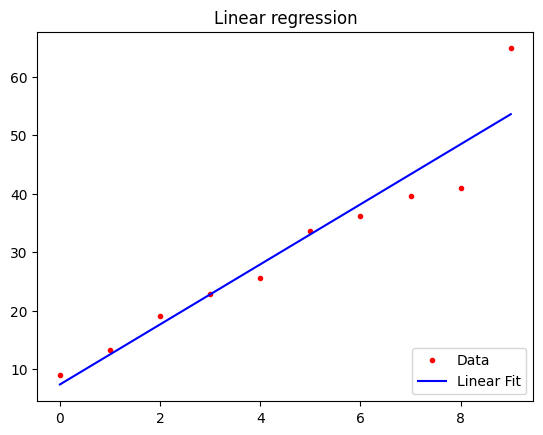

In [ ]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



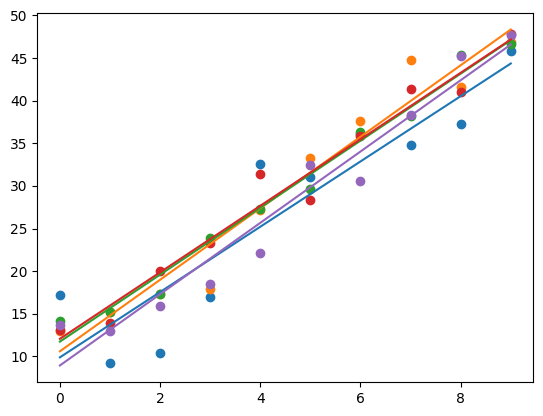

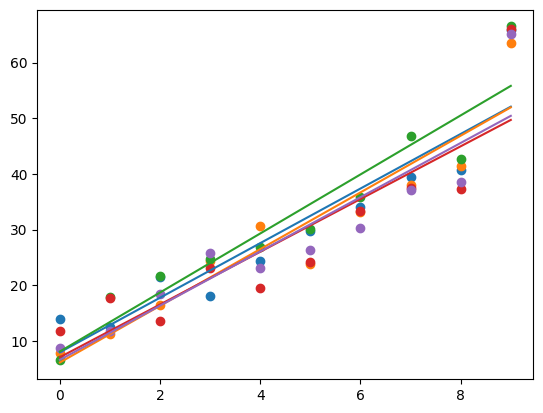

In [ ]:
def s(X, Y):
    n = len(X)
    moy_x = np.mean(X)
    moy_y = np.mean(y)

    return (1/(n-1))*sum((X-moy_x)*(Y-moy_y))


def estimateur_b(X,Y):
    b1 = s(X,Y)/ s(X,X)
    b0 = np.mean(Y) - b1*np.mean(X)

    return b0, b1

def sse_from_data(X, Y):
    b0, b1 = estimateur_b(X, Y)
    n = len(Y)
    Y_pred = b0 + b1*X
    SSE = np.sum((Y - Y_pred)**2)
    return SSE / (n-1)
    

n_datasets = 5
n_samples = 10

datasets_outlier = [generate_data(n_samples=n_samples, outlier=True) for _ in range(n_datasets)]
datasets_no_outlier = [generate_data(n_samples=n_samples, outlier=False) for _ in range(n_datasets)]

b_outlier = [estimateur_b(*dataset) for dataset in datasets_outlier]
b_no_outlier = [estimateur_b(*dataset) for dataset in datasets_no_outlier]

s_outlier = [sse_from_data(*dataset) for dataset in datasets_outlier]
s_no_outlier = [sse_from_data(*dataset) for dataset in datasets_no_outlier]


for i in range(5):
    d = datasets_no_outlier[i]
    b = b_no_outlier[i]
    plt.scatter(d[0], d[1])
    plt.plot(d[0],b[0] + b[1]*d[0])

plt.figure()
for i in range(5):
    d = datasets_outlier[i]
    b = b_outlier[i]
    plt.scatter(d[0], d[1])
    plt.plot(d[0],b[0] + b[1]*d[0])



La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i

Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [61]:
x, y = generate_data(n_samples=10, outlier=True)



#### <span style="color:blue">REPONSE 4.2.a :</span> 


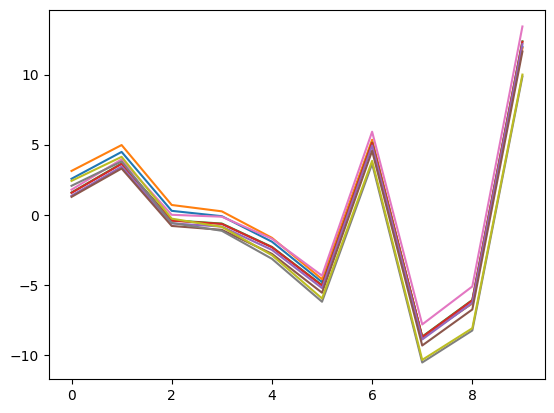

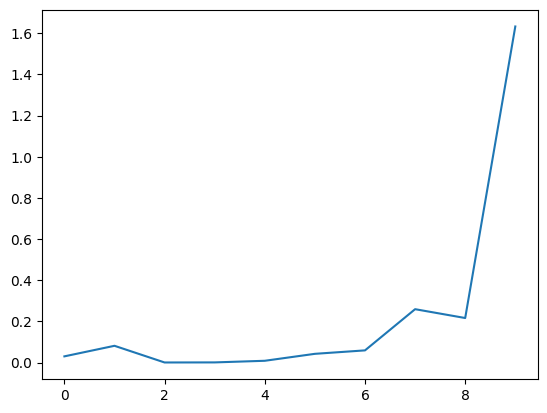

In [62]:
def profil_residuel(x, y):
    n = len(x)
    e = np.zeros((n, n))

    for i in range(n):
        y_del = np.delete(y, i)
        x_del = np.delete(x, i)

        lr = LinearRegression()
        lr.fit(x_del.reshape(-1,1), y_del)

        e[i, :] = y - lr.predict(x.reshape(-1,1))

    return e

def distance_cook(x, y , i):
    y_del = np.delete(y, i)
    x_del = np.delete(x, i)

    lr_del = LinearRegression()
    lr_del.fit(x_del.reshape(-1,1), y_del)

    lr = LinearRegression()
    lr.fit(x.reshape(-1,1), y)

    di = sum((lr_del.predict(x.reshape(-1,1)) - lr.predict(x.reshape(-1,1)))**2) / (2 * sse_from_data(x, y))

    return di

x_plot = np.arange(0,10,1)

for i in range(9):
    plt.plot(x_plot, profil_residuel(x,y)[i])

plt.figure()
plt.plot(x_plot, [distance_cook(x,y, i) for i in range(10)])



In [ ]:
...

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [ ]:
def cook(x, y, i):
    ...
    
    return ...

#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [ ]:
...

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...